# IS 362 – Week 8 Assignment# IS 362 – Week 8 Assignment

In [1]:
import pandas as pd

data_filepath = "C:\\Users\\Victor Pessoa\\Downloads\\auto+mpg\\auto-mpg.data"
auto_mpg_data = pd.read_csv(data_filepath, delim_whitespace=True, header=None)

auto_mpg_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


###### The data has been loaded successfully. From the initial view, we can see columns such as MPG, number of cylinders, displacement, horsepower, weight, acceleration, model year, origin, and car name.

In [2]:
with open("C:\\Users\\Victor Pessoa\\Downloads\\auto+mpg\\auto-mpg.names", "r") as file:
    names_content = file.readlines()

column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

auto_mpg_data.columns = column_names

auto_mpg_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


###### The DataFrame columns have been successfully renamed based on the attribute information.

### Some of the horsepower data is marked as missing with a ‘?’. I need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric:

In [3]:
auto_mpg_data['horsepower'].replace('?', pd.NA, inplace=True)

auto_mpg_data['horsepower'] = pd.to_numeric(auto_mpg_data['horsepower'], errors='coerce')

auto_mpg_data[auto_mpg_data['horsepower'].isna()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


###### I've replaced the '?' values in the horsepower column with appropriate missing values (NaN) and converted the column to numeric. The displayed rows show where the horsepower data was missing.

### The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’:

In [4]:
origin_mapping = {1: 'USA', 2: 'Asia', 3: 'Europe'}
auto_mpg_data['origin'] = auto_mpg_data['origin'].map(origin_mapping)

auto_mpg_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


###### The origin column values have been successfully converted to their respective regions: 'USA', 'Asia', and 'Europe'.

### Now I will create a bar chart that shows the distribution for cylinders:

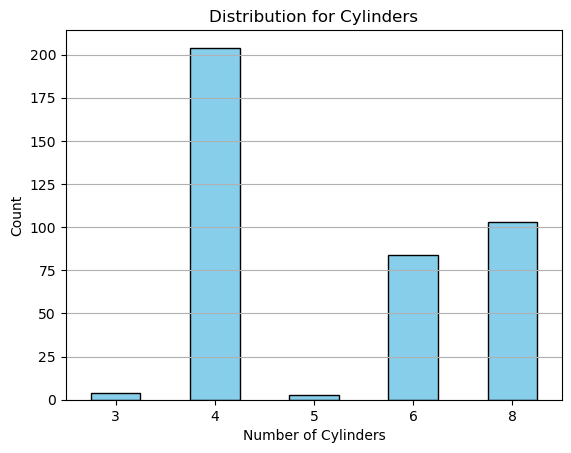

In [5]:
import matplotlib.pyplot as plt

cylinder_counts = auto_mpg_data['cylinders'].value_counts().sort_index()
cylinder_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution for Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


###### The bar chart displays the distribution of cars based on the number of cylinders. As observed, 4-cylinder cars are the most common, followed by 8-cylinder and 6-cylinder cars.

### Now I will create a scatterplot that shows the relationship between horsepower and weight:

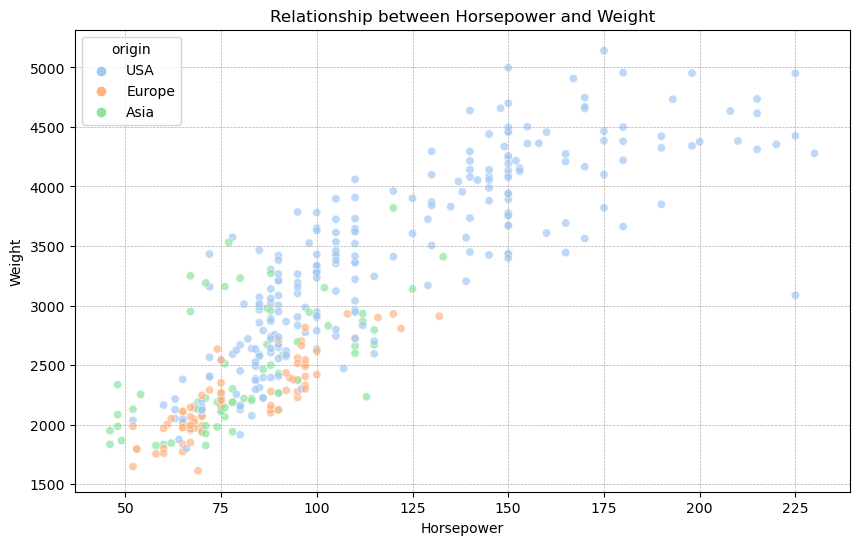

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=auto_mpg_data, x='horsepower', y='weight', hue='origin', palette='pastel', alpha=0.7)

plt.title('Relationship between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


###### The scatterplot illustrates the relationship between horsepower and weight. Generally, as horsepower increases, the weight of the car also seems to increase. Additionally, the hue represents the origin of the cars, allowing us to discern any regional patterns.

### Question: How does the average miles per gallon (MPG) vary across different regions (USA, Asia, Europe) and different model years?

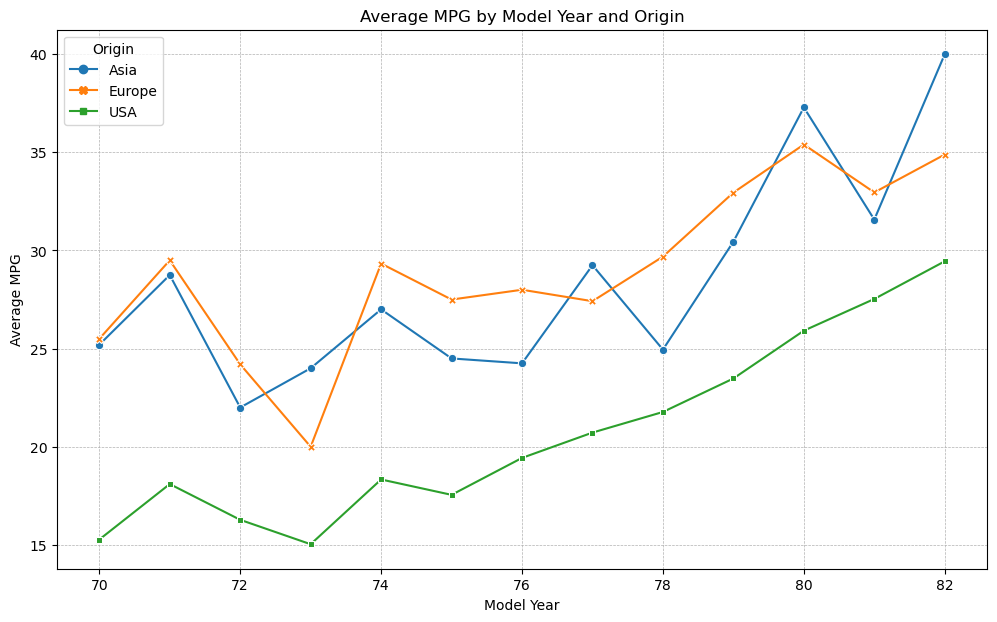

In [7]:
avg_mpg_by_year_origin = auto_mpg_data.groupby(['model_year', 'origin'])['mpg'].mean().unstack()

plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_mpg_by_year_origin, markers=True, dashes=False)

plt.title('Average MPG by Model Year and Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Origin')

plt.show()


#### The line plot displays the average miles per gallon (MPG) across different model years, segregated by origin (USA, Asia, Europe). Some observations from the plot:

    1. Across all regions, there's a general upward trend in MPG over the years, indicating improvements in fuel efficiency.
    2. European and Asian cars tend to have higher average MPG compared to USA cars, especially in the earlier years.
    3. The MPG for USA cars has improved significantly over time, closing the gap with European and Asian cars by the 1980s.

#### This analysis provides insights into the evolution of fuel efficiency across different regions over the years.